# Deploy ML Models on 🤗 Hub using Gradio

- This is the hands-on session of how to deploy to Hugging Face Spaces.
- If you would like to deploy to Hugging Face Spaces later, you can do so by creating a free account on https://huggingface.co/


### **1. Required python packages**


In [ ]:
!pip install transformers
!pip install gradio
!pip install gradio_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

- Note that if you run into issues when making an API call to your own space, you can try to upgrade your version of gradio_client:

In [ ]:
!pip install -U gradio_client

- Here is some code that suppresses warning messages.

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore",
                        message="Using the model-agnostic default `max_length`")

## 🤗 Spaces

- You can create an account on hugging face from [here](https://huggingface.co), to follow the instructions provided in the video.

### App Demo: Image Captioning

- Load the model and create an app interface using Gradio to perform Image Captioning.

### Troubleshooting Tip
- Note, in the classroom, you may see the code for creating the Gradio app run indefinitely.
  - This is specific to this classroom environment when it's serving many learners at once, and you won't wouldn't experience this issue if you run this code on your own machine.
- To fix this, please restart the kernel (Menu Kernel->Restart Kernel) and re-run the code in the lab from the beginning of the lesson.

In [ ]:
import os
import gradio as gr
from transformers import pipeline

In [ ]:
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [ ]:
def launch(input):
    out = pipe(input)
    return out[0]['generated_text']

In [ ]:
iface = gr.Interface(launch,
                     inputs=gr.Image(type='pil'),
                     outputs="text")

In [ ]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7f84e8b74eb1be43ac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def create_logo(filename=None):
    return gr.Image(
              source=filename or "upload",
              width=5,
              height=75,
              scale=0,
              show_label=False,
              show_download_button=False,
          )

def create_title(title):
    return gr.Markdown(
              f"""
                  <h1>{title}</h1>
                  <style>
                      .gradio-container-3-50-2 .prose h1 {
                          text-align: center;
                          margin-top : 10px;
                          padding-top : 10px;
                          margin-left : -200px;
                          padding-left : -200px;
                          font-size: 2em;
                      }
                  </style>
              """
          )

# Logic (backend)
def predict(prompt, history):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]


# UI Elements (Frontend)
with gr.Blocks() as demo:
    with gr.Row():
        create_logo()
        create_title("IABG's ChatGPT")
    # Chat Interface
    gr.ChatInterface(predict)

# Launch the gradio app for 72 hours
demo.launch(share=True)


- Close the demo port.

In [ ]:
demo.close()

Closing server running on port: 7860


### Close the app
- Please remember to call `.close()` on the Gradio app before continuing.

### Use the deployed Model through gradio client


In [ ]:
from gradio_client import Client

client = Client("huggingface-projects/llama-2-7b-chat")
result = client.predict(
		"Hello!!",	# str  in 'Message' Textbox component
		"Hello!!",	# str  in 'System prompt' Textbox component
		512,	# float (numeric value between 1 and 2048) in 'Max new tokens' Slider component
		0.1,	# float (numeric value between 0.1 and 4.0) in 'Temperature' Slider component
		0.05,	# float (numeric value between 0.05 and 1.0) in 'Top-p (nucleus sampling)' Slider component
		1,	# float (numeric value between 1 and 1000) in 'Top-k' Slider component
		1,	# float (numeric value between 1.0 and 2.0) in 'Repetition penalty' Slider component
		api_name="/chat"
)
print(result)

Loaded as API: https://huggingface-projects-llama-2-7b-chat.hf.space ✔
 Hello! 😊 It's nice to meet you! How are you today?


### Deploying to Hugging Face Spaces

- Go to [https://huggingface.co/spaces](https://huggingface.co/spaces)![](./images_app/create_new_space_00.png)


- Click the button "create new space".

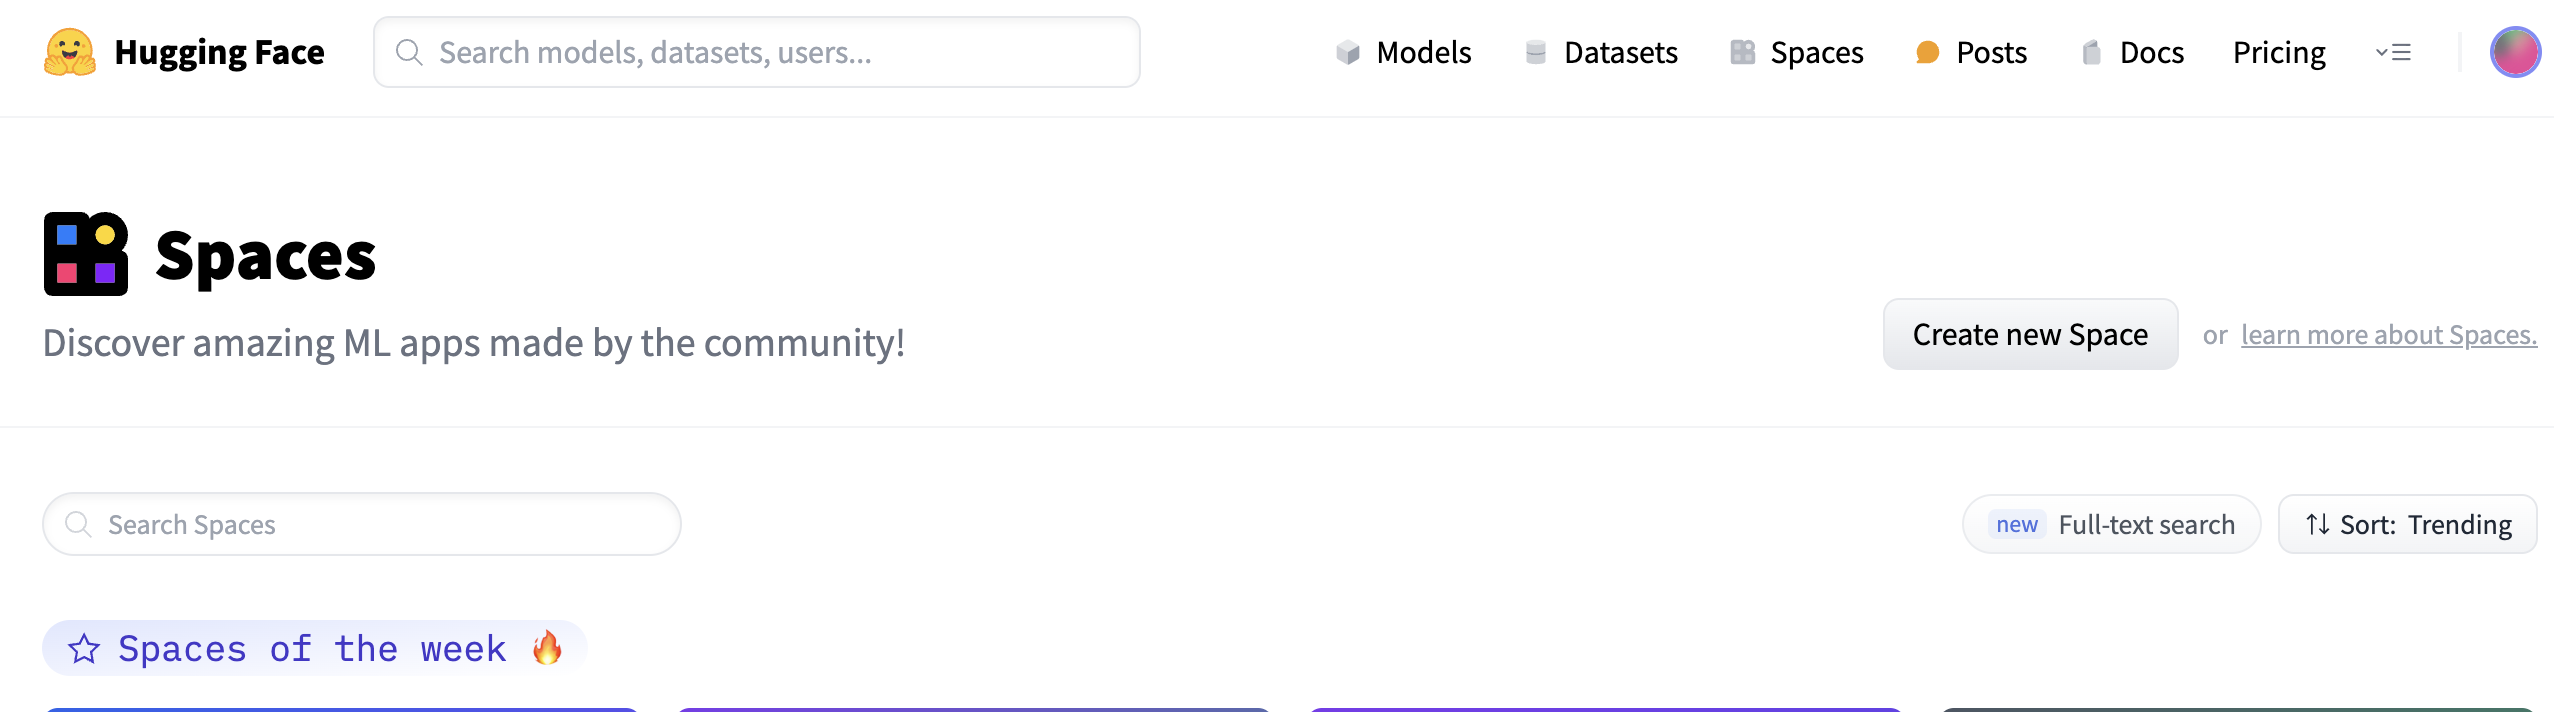![](./images_app/create_new_space_01.png)

- Give the space a name, such as "blip-image-captioning".
- Choose a license, such as Apache 2.0
- For "Select the Space SDK", click "Gradio".
- For Hardware, choose the default free option: "CPU Basic"


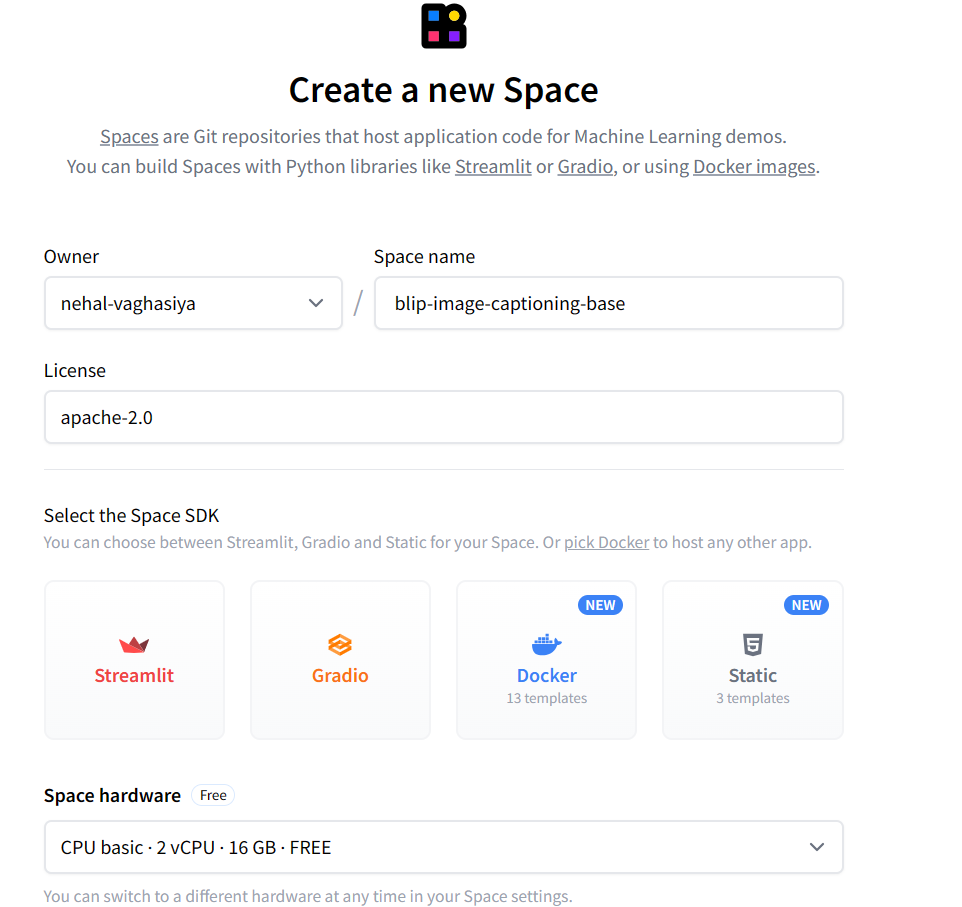

- Leave it as "public"
- Click "create space".

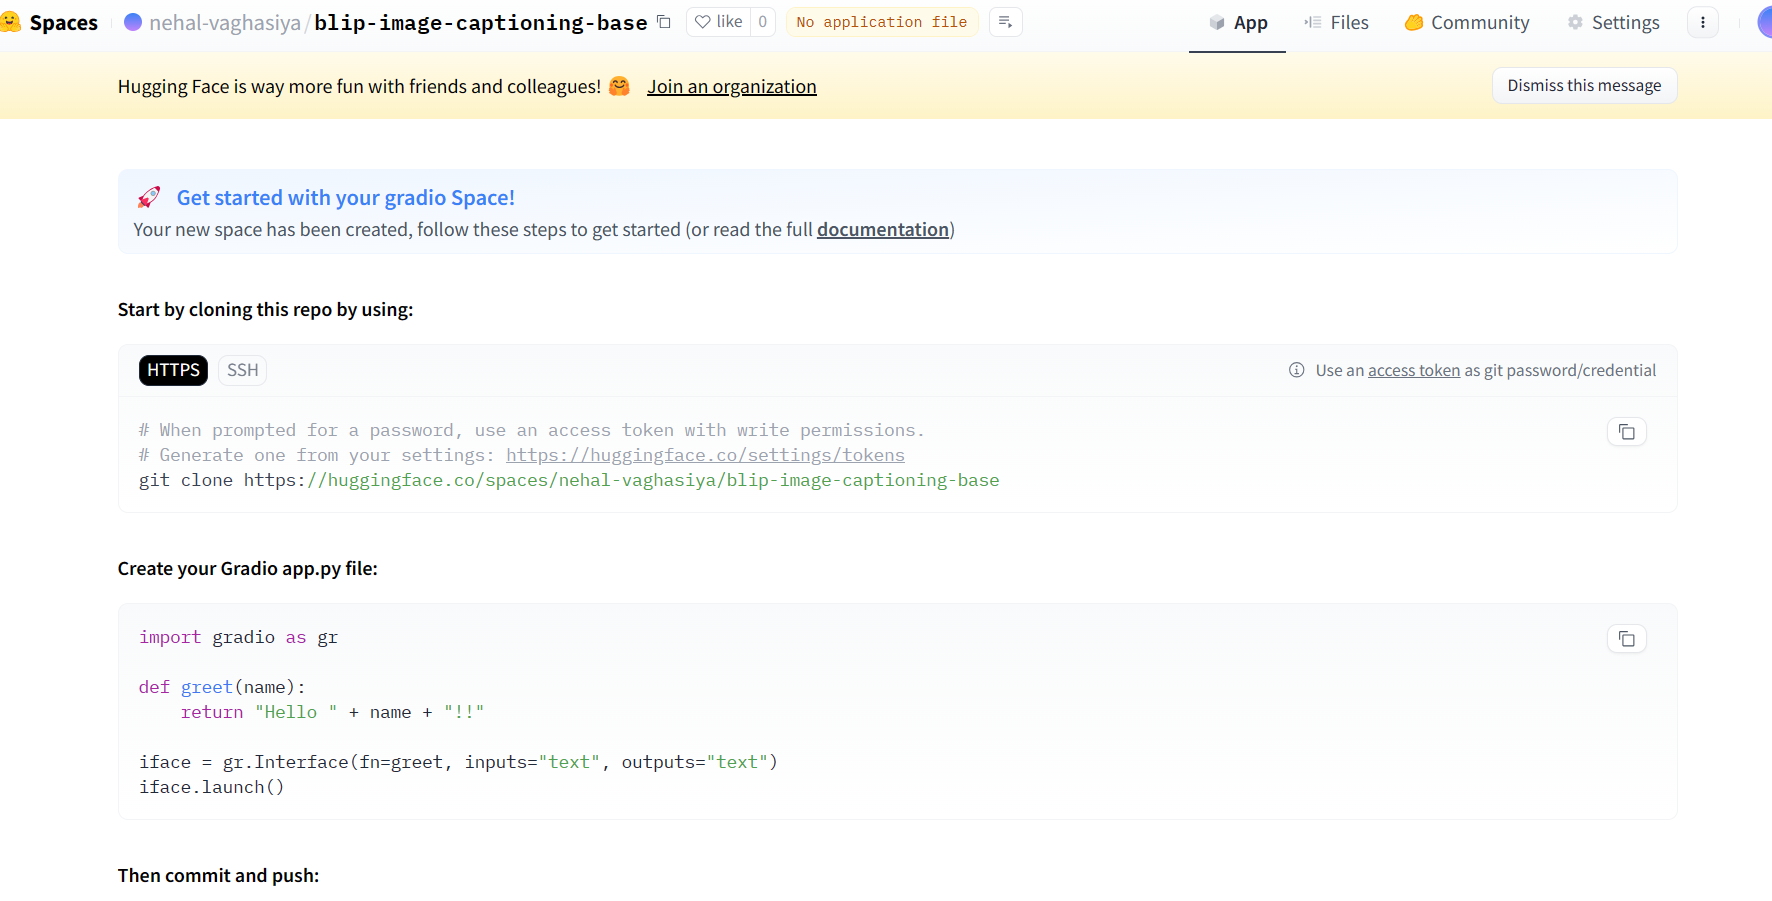
- You will see a new page with instructions for how to get started by cloning and updating a GitHub repo.
- You can also add the required files directly in the web browser if you'd like to get a small app running quickly.  Click on "Files" at the top.

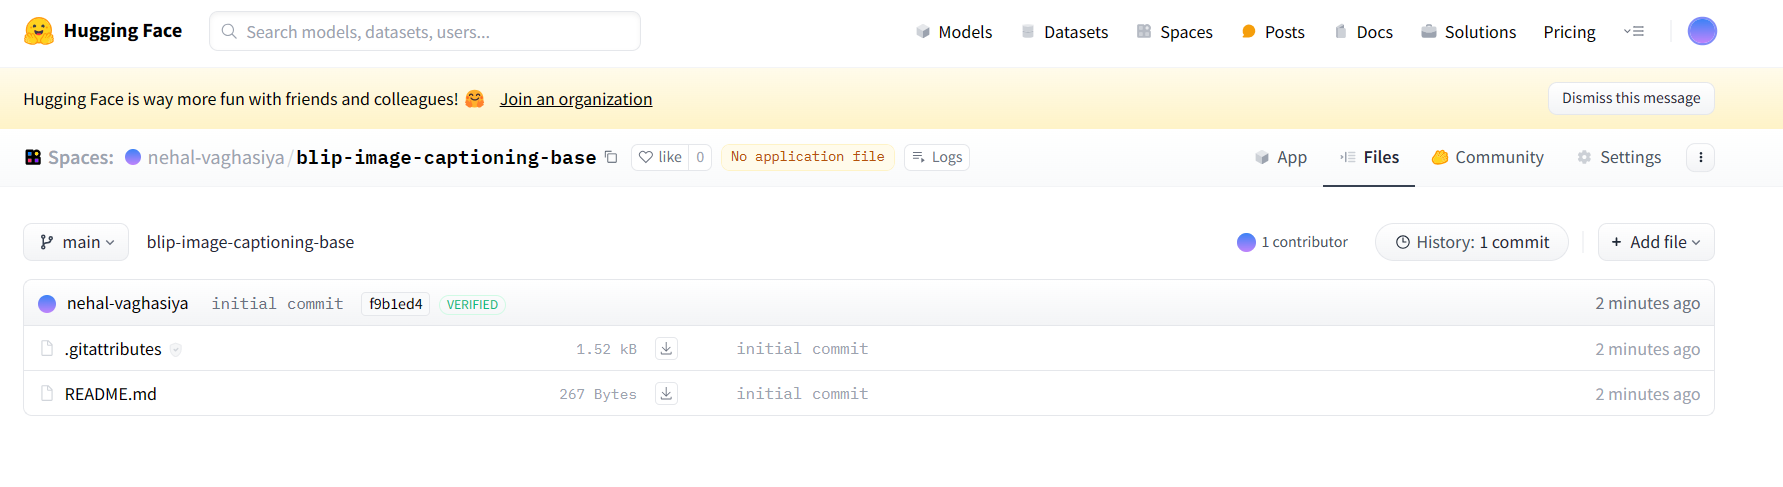
- Click on "+ Add file"->"Create new File".

### Add requirements.txt


![](./images_app/requirements_01.png)

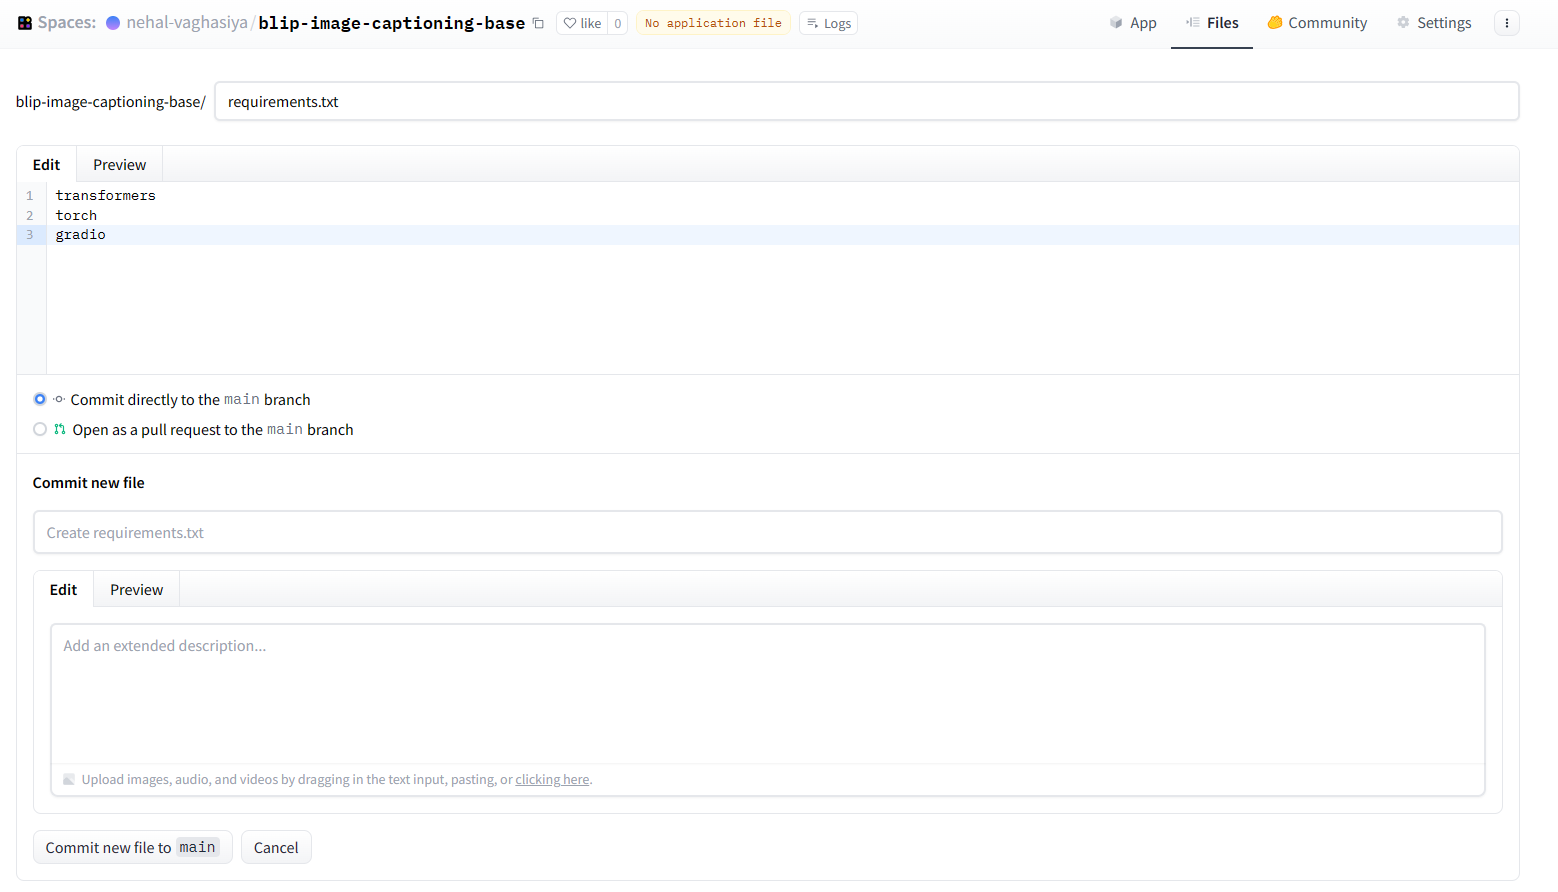

- Add a file called requirements.txt.
- Paste in the following:

```
transformers
torch
gradio
```

- Leave "Commit Directly to the main branch" selected.
- Click "commit new file to main".

### Add app.py

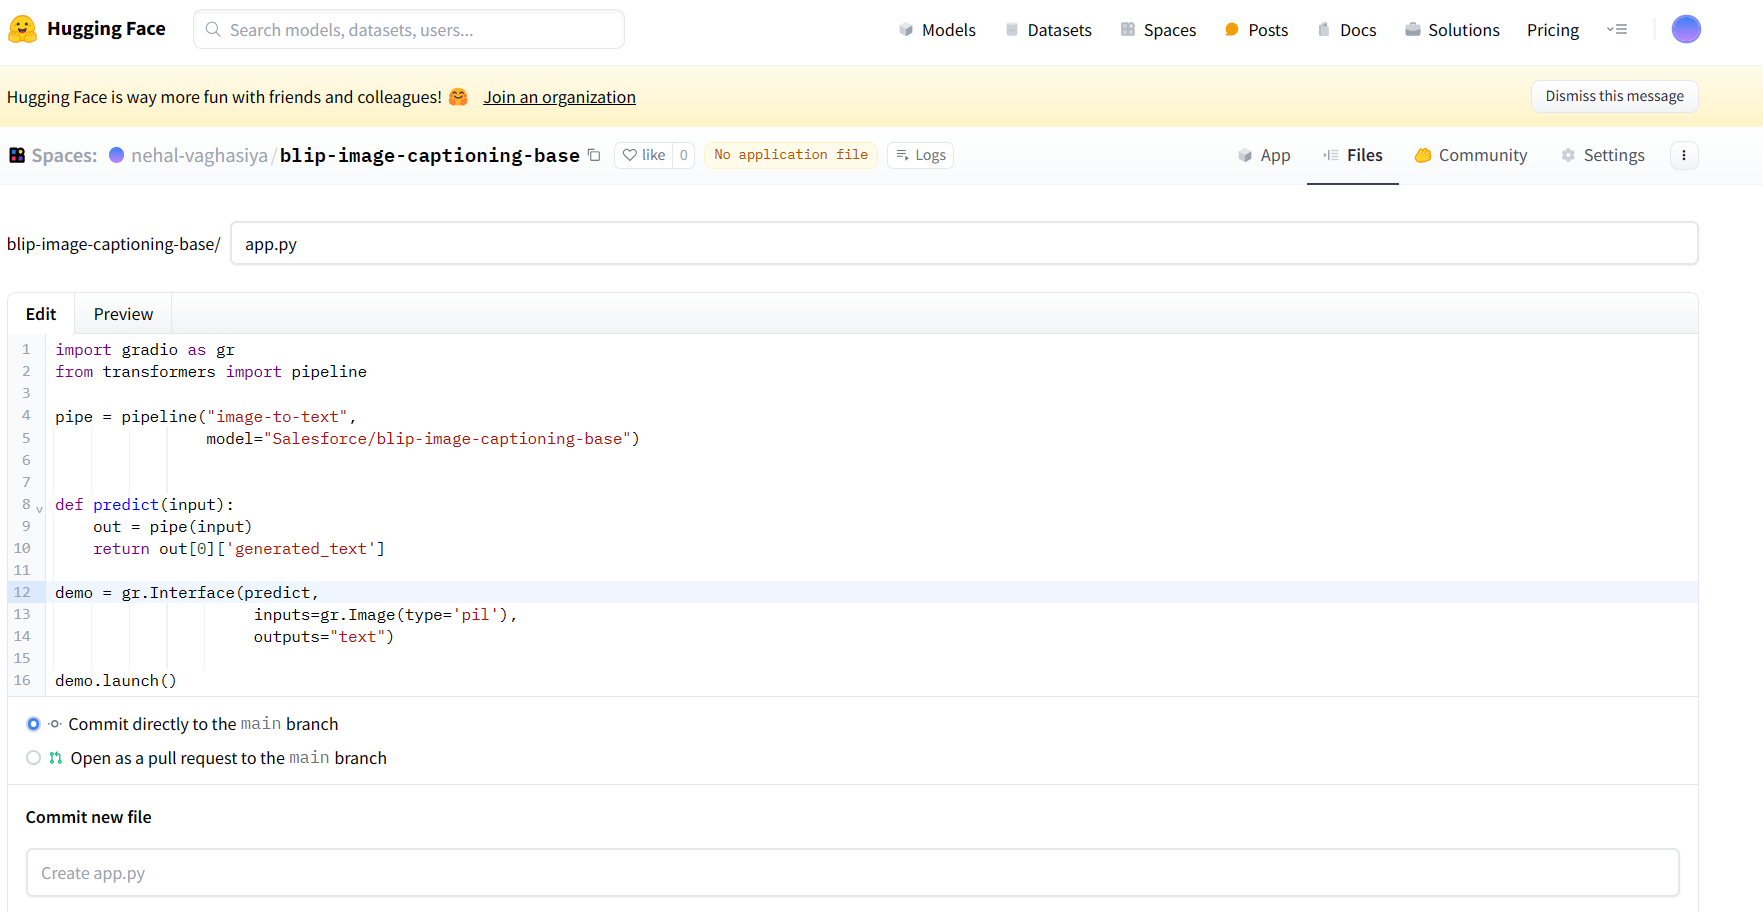

- In the textbox "Name Your File", type "app.py"
- In the textbox for your code, paste in the code that you ran above, or copy this block below:



```Python
import gradio as gr
from transformers import pipeline

pipe = pipeline("image-to-text",
                model="Salesforce/blip-image-captioning-base")


def predict(input):
    out = pipe(input)
    return out[0]['generated_text']

demo = gr.Interface(predict,
                     inputs=gr.Image(type='pil'),
                     outputs="text")

demo.launch()
```
- Notice that `demo.launch()` does not have `share=True`

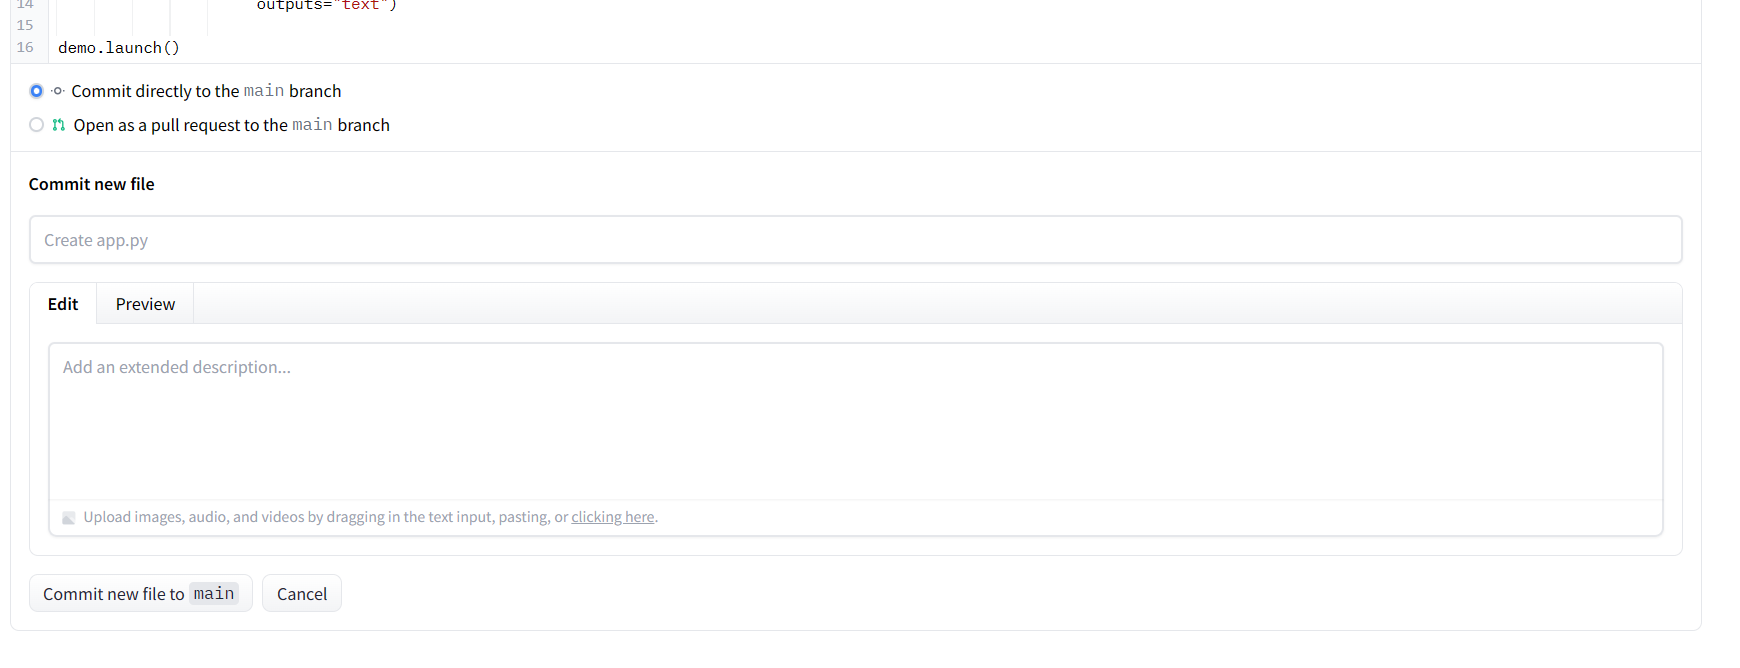![](./images_app/app_02.png)

- Leave "Commit Directly to the main branch" selected.
- Click "Commit new file to main".

### View the app
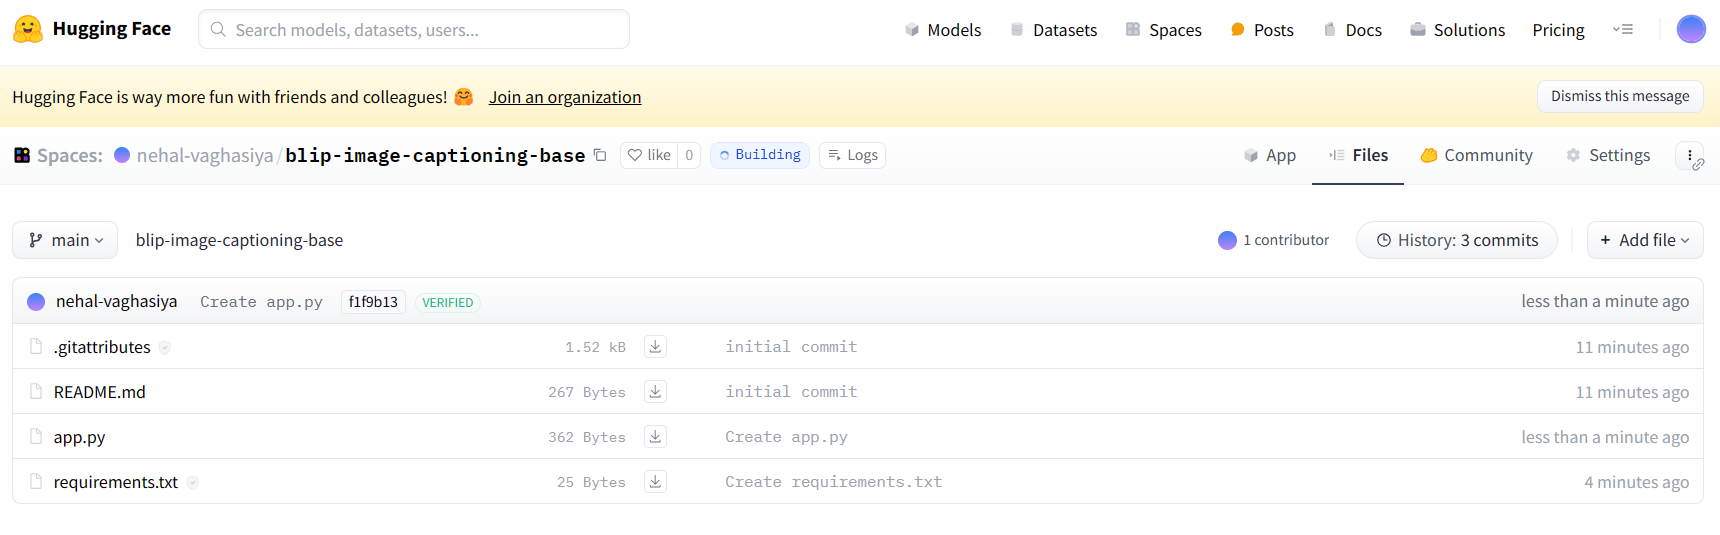![](./images_app/app_tab.png)

- You will see that the app is still "Building" for a few minutes.
- You can click on the "App" menu to the left of the "Files" menu to see the console as the space is being built.
![](app_tab.png)

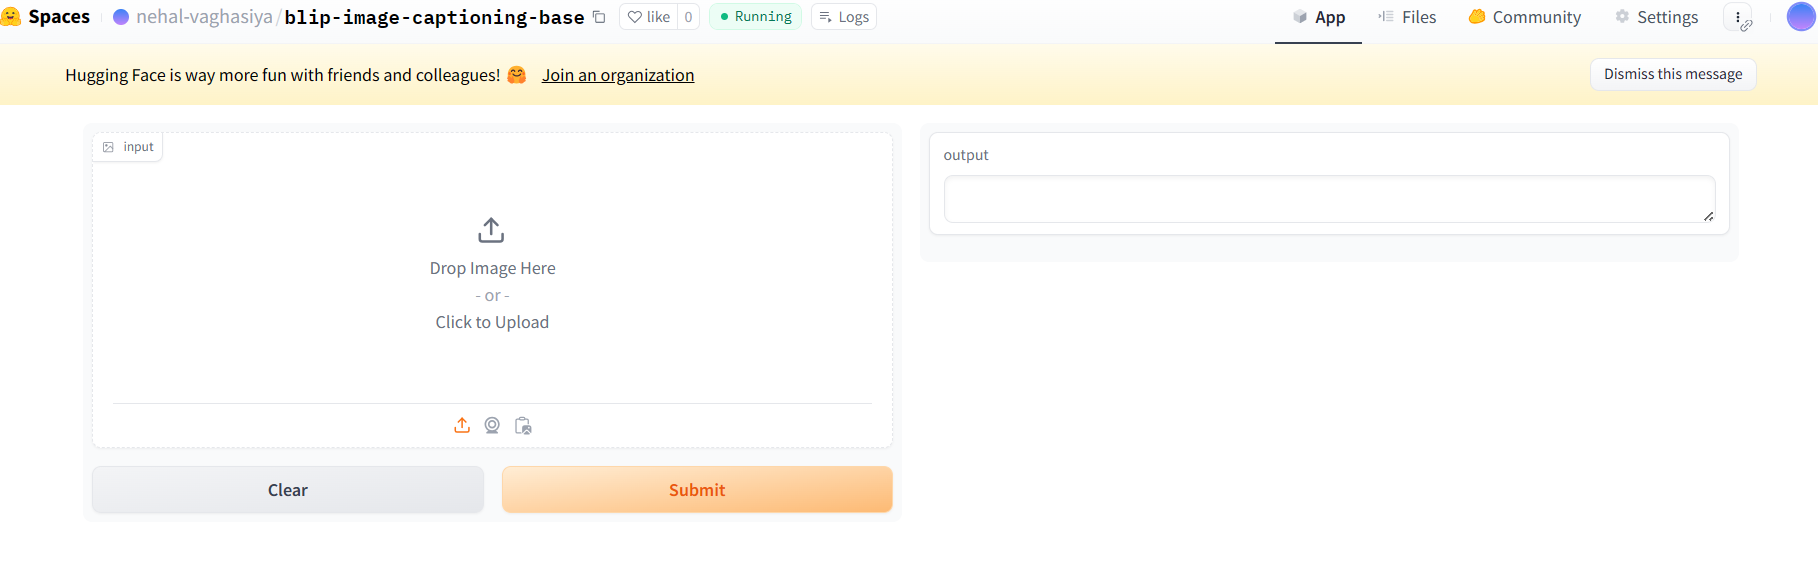

- When the build is done, you'll see your app!
- At the bottom, you can click "Use via API" to see sample code that you can use to use your model with an API call.

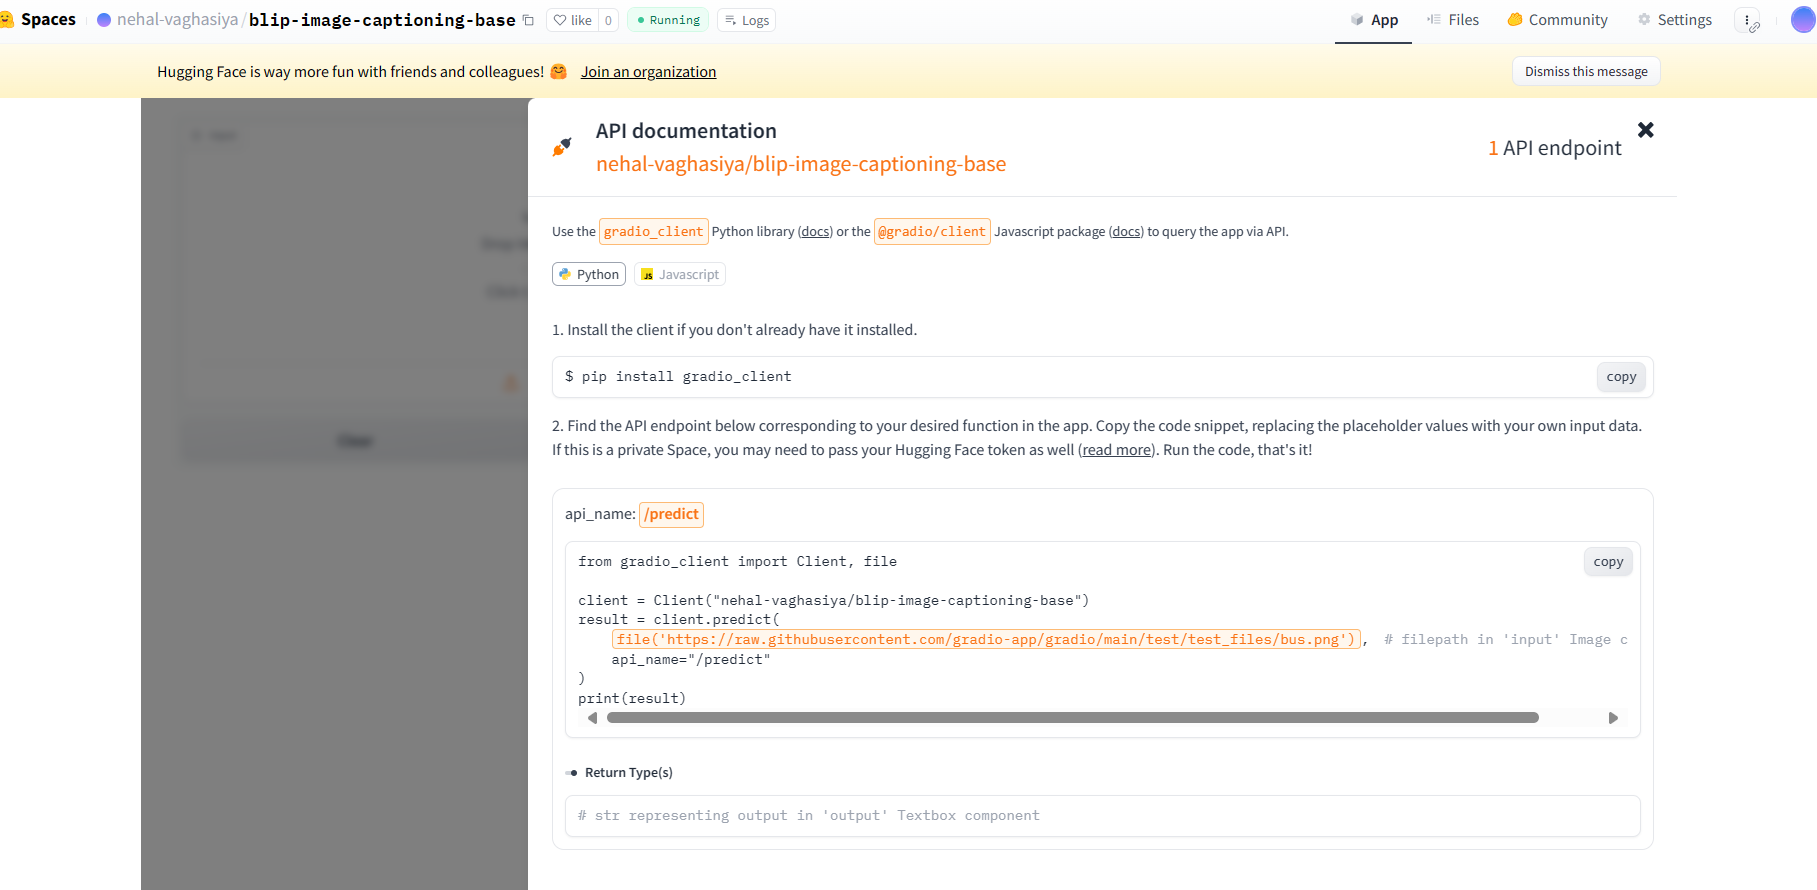![](./images_app/api_01.png)

- You can run the pip install if you haven't already done so.
- In the classroom, gradio_client should already be installed for you.
- Copy the sample code, which will look something like this:

```Python
from gradio_client import Client, file

client = Client("nehal-vaghasiya/blip-image-captioning-base")
result = client.predict(
		file('https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png'),	# filepath in 'input' Image component
		api_name="/predict"
)
print(result)
```

- Note, you can replace the string within `client.predict()` with a string that points to a local file.
- In the classroom, feel free to upload your own to the file directory.

So your code may look like this:
```Python
from gradio_client import Client

client = Client("nehal-vaghasiya/blip-image-captioning-base")
result = client.predict(
		"/image_path.png",
		api_name="/predict"
)
print(result)
```

- Inspect the information in the API.

```Python
client.view_api()
```
- The output may look like this:


```
Client.predict() Usage Info
---------------------------
Named API endpoints: 1

 - predict(input, api_name="/predict") -> output
    Parameters:
     - [Image] input: filepath
    Returns:
     - [Textbox] output: str

```

### (Optional) Access to your private space as an API.

You can make your space private, so that it can be accessed with an access token.

To make the space private click on the "Settings" menu at the top.  Scroll down until you see "Change space visibility" and click the "Make private" button.



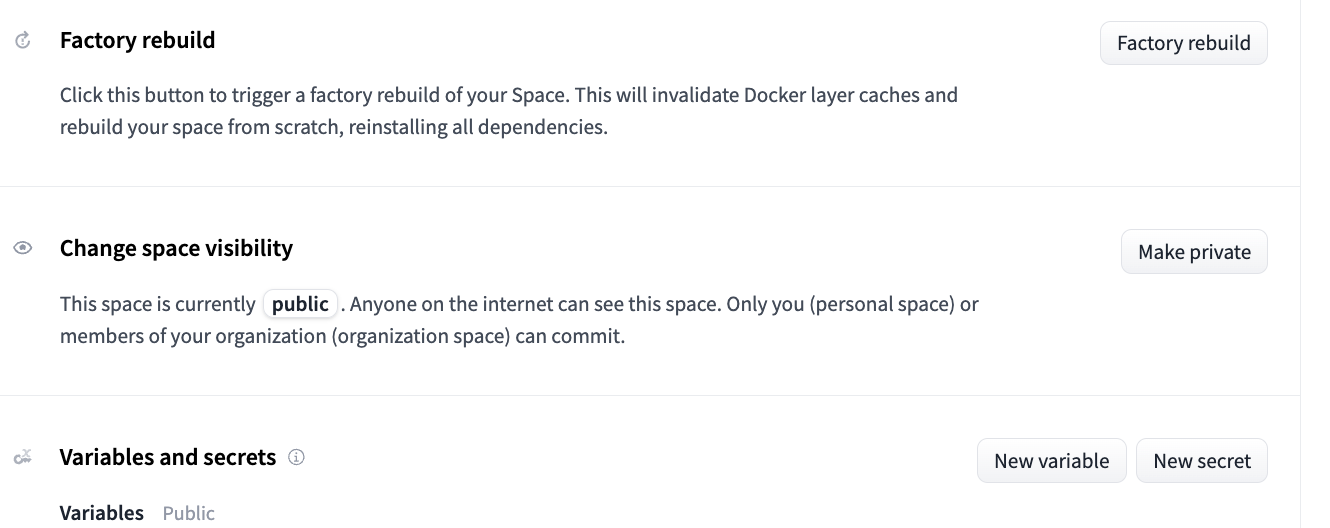

### Get an access token
- To get an access token, go to your profile (click on your profile icon).
- On your profile page, click the "Settings" button on the left.


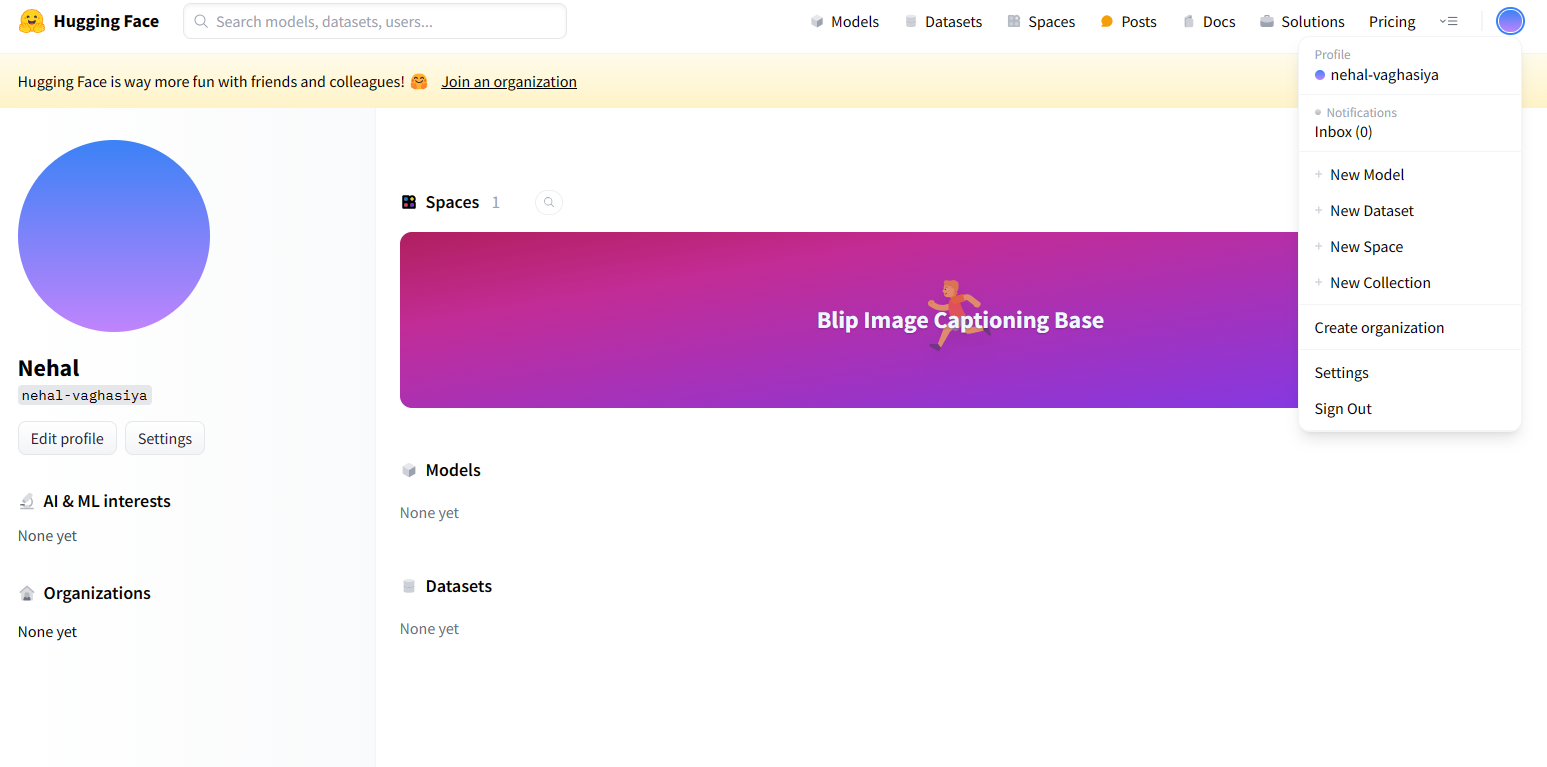

- In your profile settings, on the left side menu, click "Access Tokens".
- Click "New token".

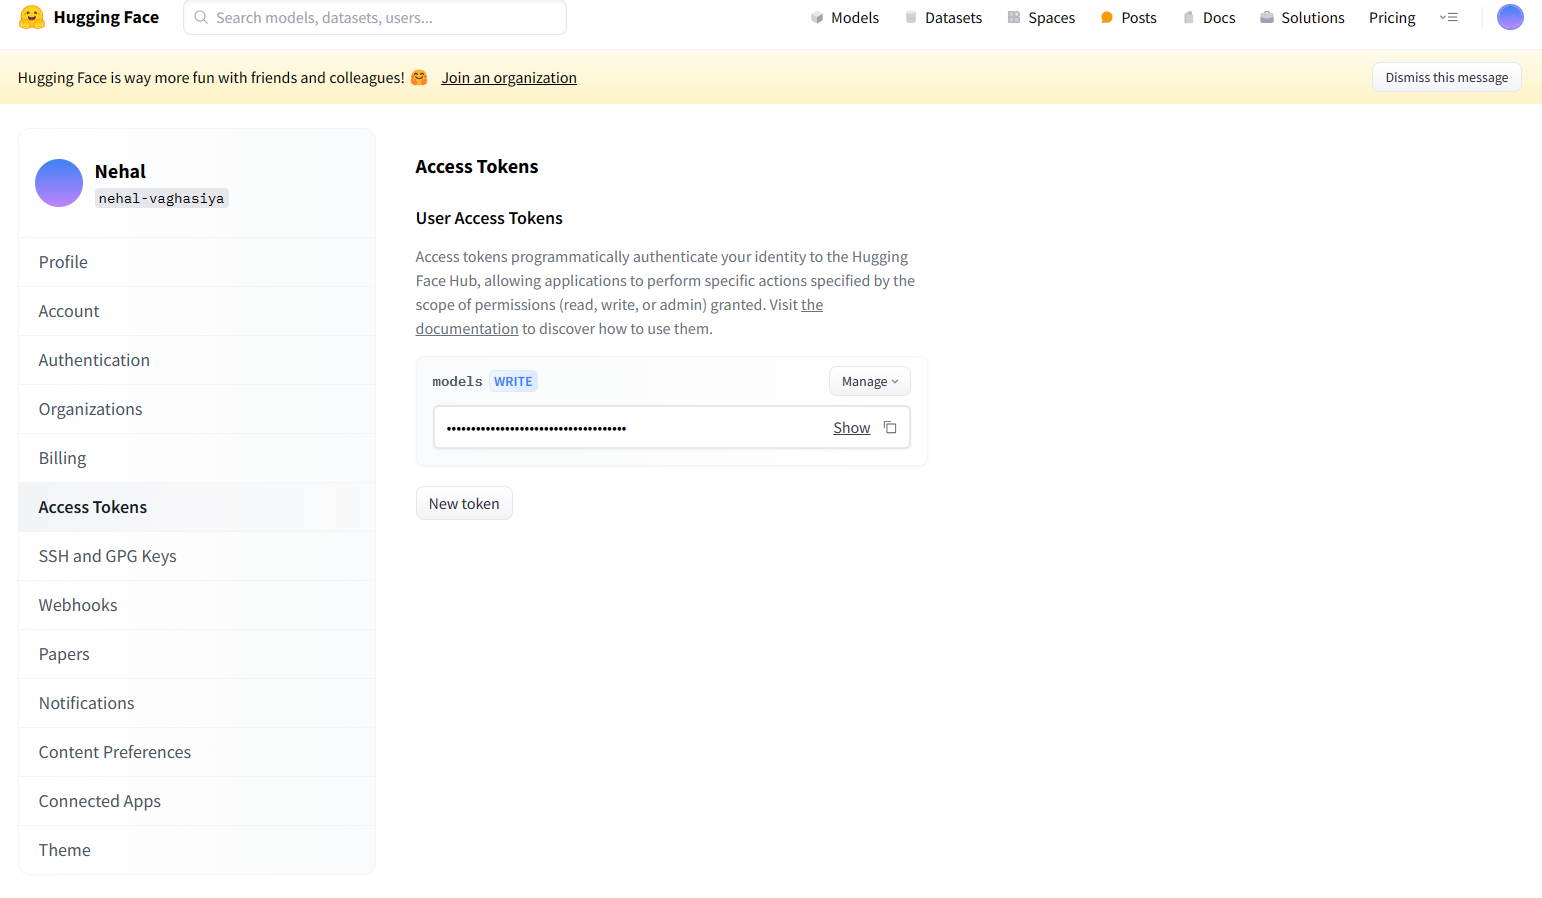![](./images_app/access_tokens_01.png)

- In the pop-up, give a description of what the token is for.
- You can leave it as "read" (the other option is "write").
- Click "create new token".  

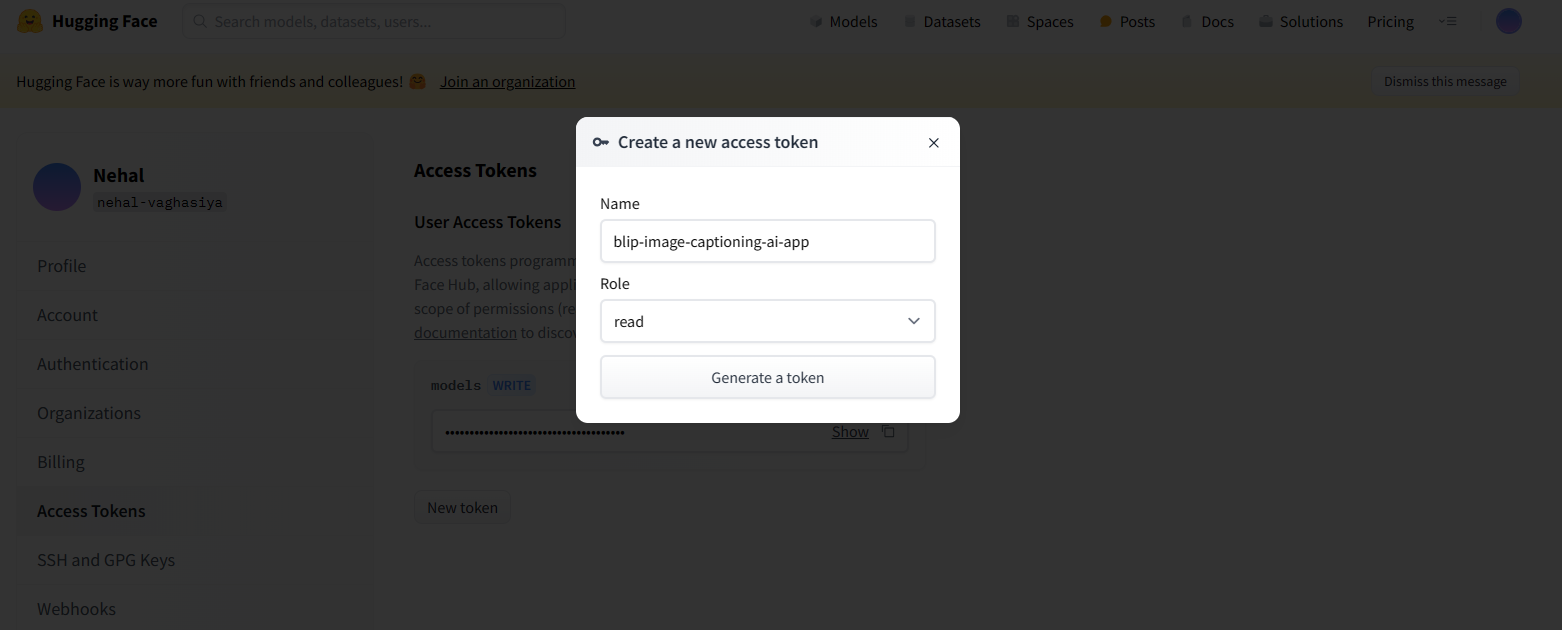

- You can copy the access token.

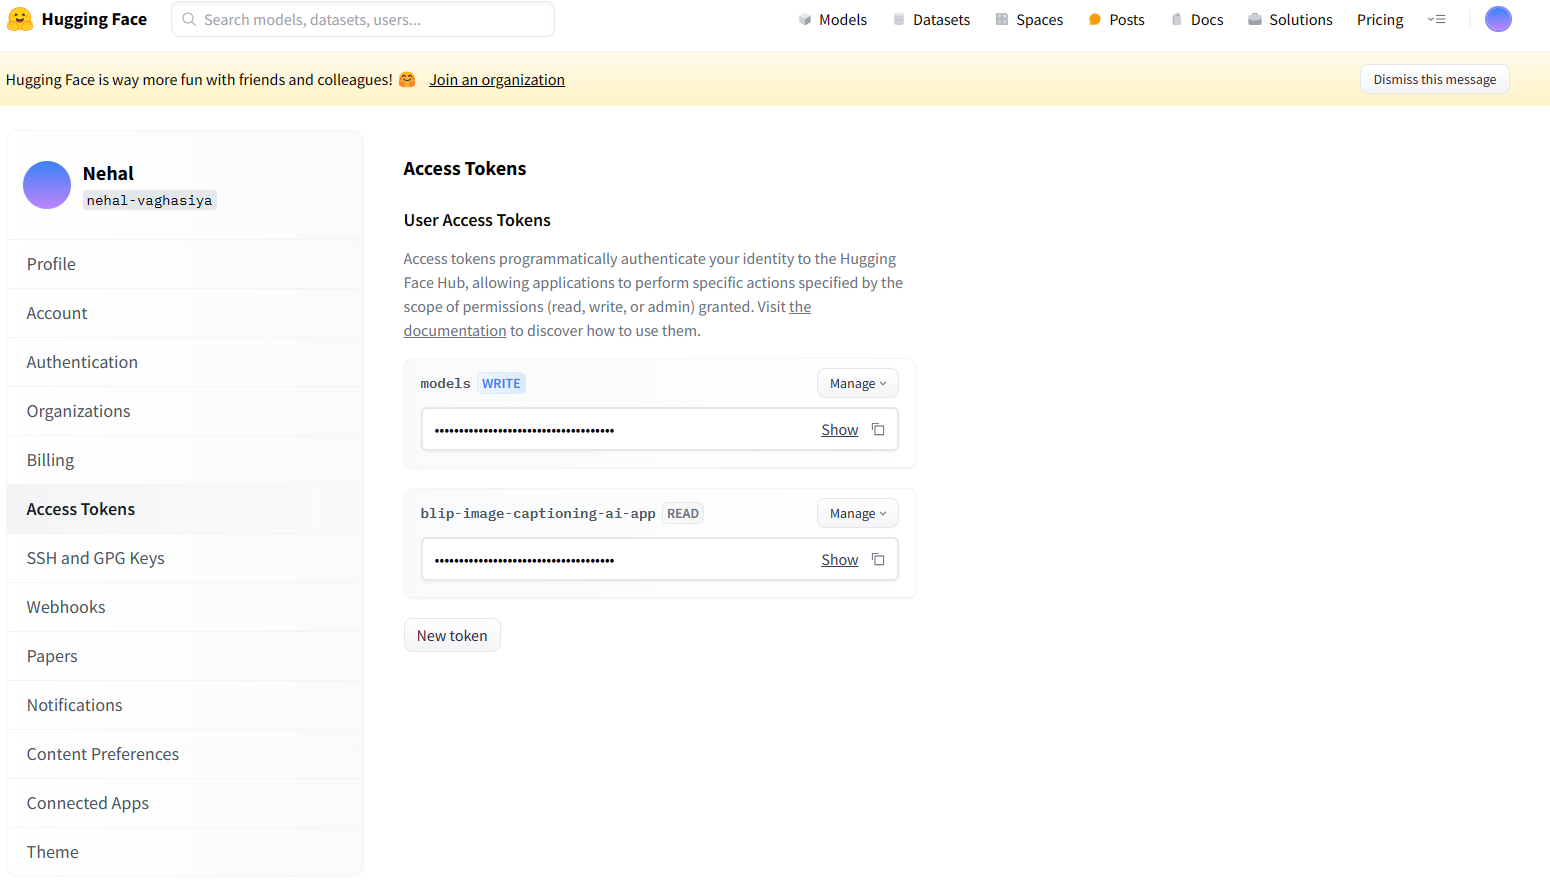![](./images_app/access_tokens_02.png)

You can modify the API call to include your access token.

```Python
from gradio_client import Client

client = Client("nehal-vaghasiya/blip-image-captioning-base",
                hf_token=hf_access_token
               )
result = client.predict(
		"/image_path.jpg",
		api_name="/predict"
)
print(result)
```

### Saving your access token securely
- It's recommended that you not hard code the access token.

```Python
HF_TOKEN="abc1234" # not recommended
```

- You can save your access token to a file ".env"

```
HF_ACCESS_TOKEN="abc123"
```

Then access that environment variable with the `dotenv` library

```Python
# !pip install python-dotenv # install library
from dotenv import load_dotenv, find_dotenv
import os
_ = load_dotenv(find_dotenv())
hf_access_token = os.getenv("HF_ACCESS_TOKEN")
```

### GPU Zero Space
- [ZeroGPU Explorers](https://huggingface.co/zero-gpu-explorers): A place to spin free GPUs on demand for your spaces.